In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from sklearn.decomposition import PCA

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

## Load dataset

In [2]:
iris_ds = datasets.load_iris()

In [3]:
print("Feature names:", iris_ds.feature_names)
print("Target names:", iris_ds.target_names)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [4]:
X = pd.DataFrame(iris_ds.data,columns=iris_ds.feature_names)
y = pd.DataFrame(iris_ds.target,columns=['Species'])

In [5]:
iris = pd.concat([X,y],axis=1)

In [6]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
iris.describe(include='all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [9]:
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

## Data visualisation

#### scatter plot between sepal length and sepal width

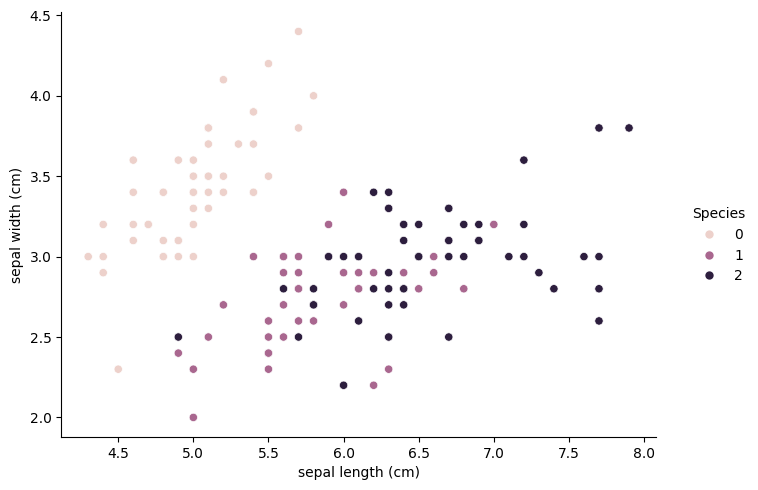

In [10]:
g=sns.relplot(x='sepal length (cm)',y='sepal width (cm)',data=iris,hue='Species')
g.fig.set_size_inches(8,5)
plt.show()

#### scatter plot between petal length and petal width

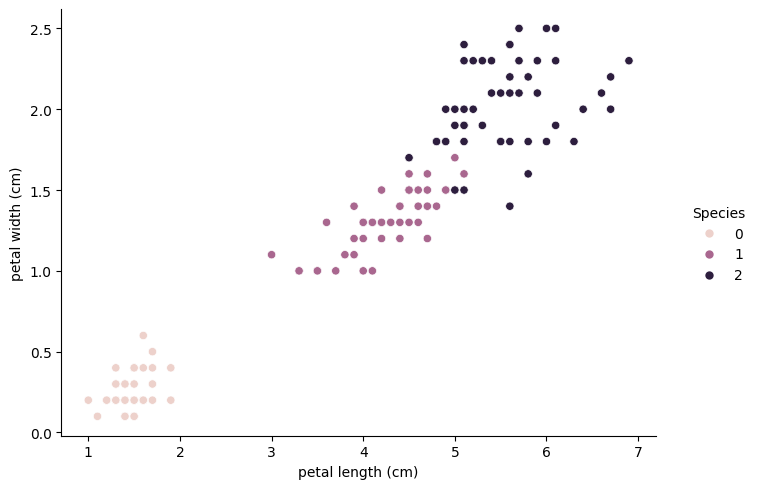

In [11]:
g=sns.relplot(x='petal length (cm)',y='petal width (cm)',data=iris,hue='Species')
g.fig.set_size_inches(8,5)
plt.show()

#### pair plots visualize relationships between each variable

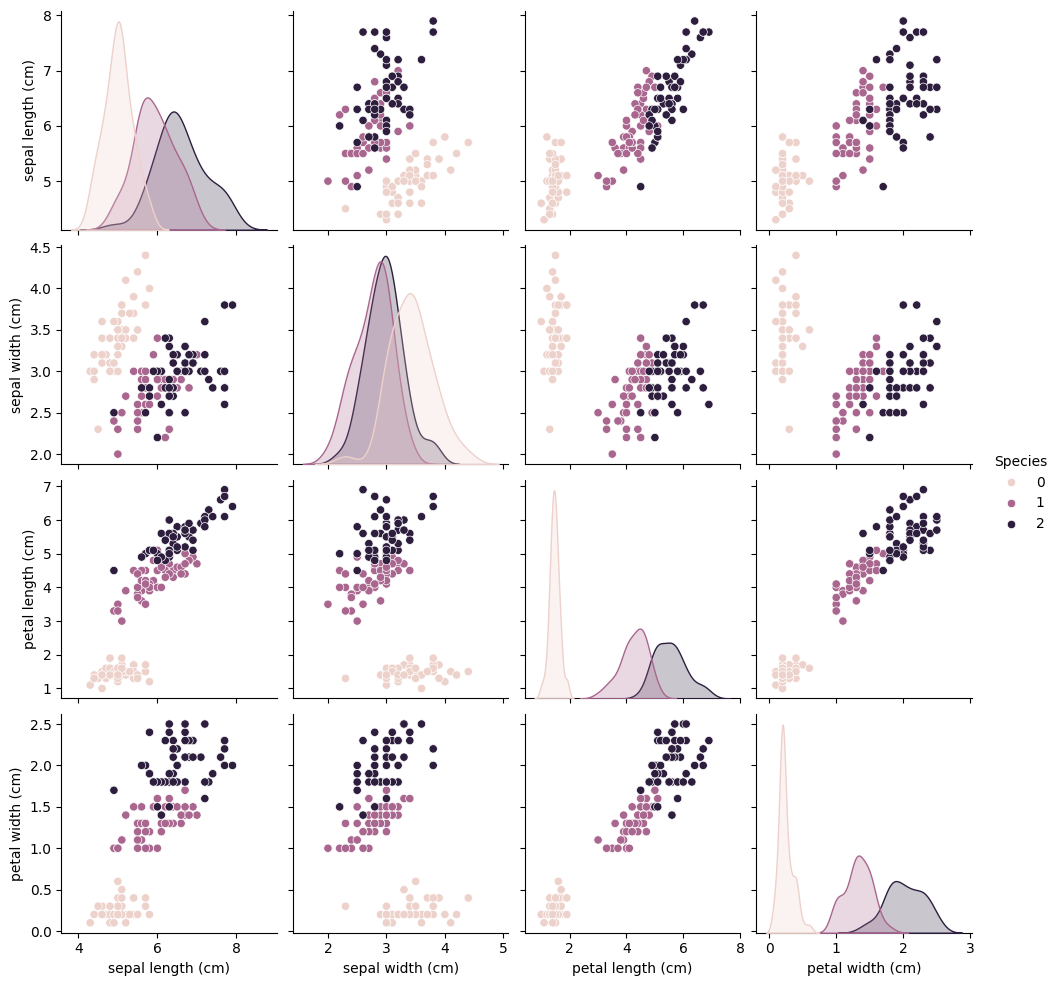

In [12]:
sns.pairplot(iris,hue="Species")
plt.show()

#### correlation

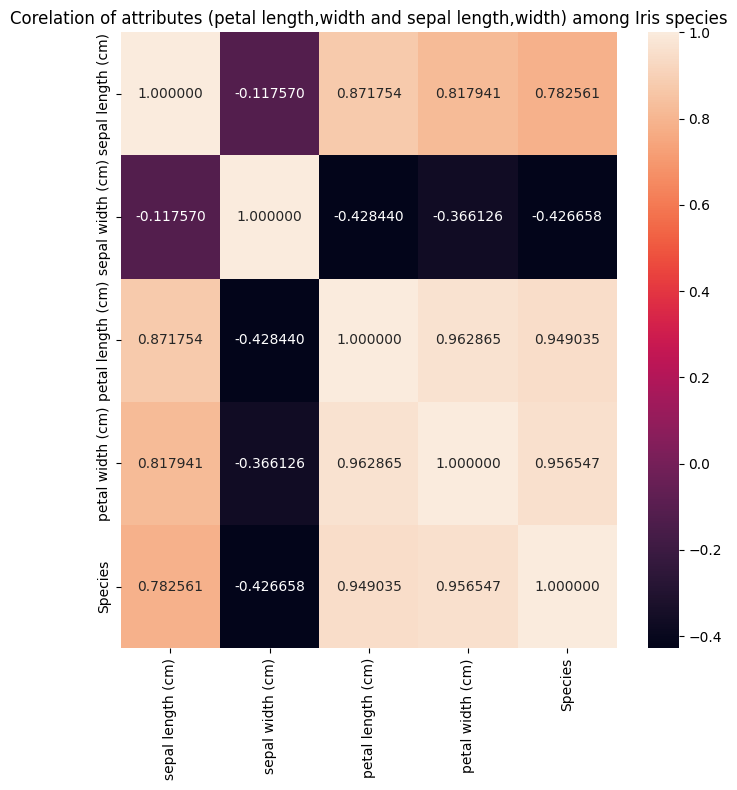

In [13]:
plt.subplots(figsize = (8,8))
sns.heatmap(iris.corr(),annot=True,fmt="f").set_title("Corelation of attributes (petal length,width and sepal length,width) among Iris species")
plt.show()

#### use Principal component analysis to plot our data in 3d

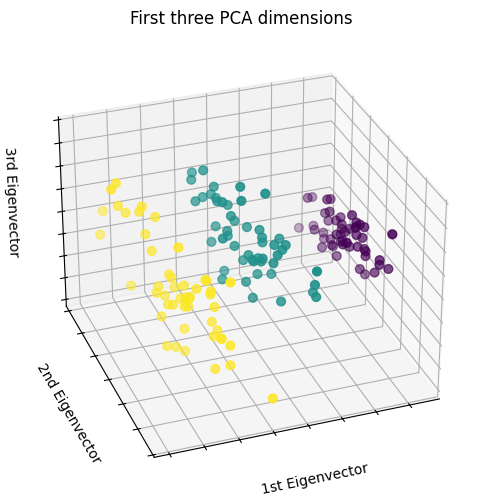

In [14]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris['Species'],
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

#### data has good separability

## Models training

#### split data into train and test samples

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [16]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

#### method to calculate and print metrics

In [17]:
def print_metrics(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    precision =precision_score(y_test, y_pred,average='micro')
    recall =  recall_score(y_test, y_pred,average='micro')
    f1 = f1_score(y_test,y_pred,average='micro')
    print('Confusion matrix:\n',cm)
    print('accuracy: %.3f' %accuracy)
    print('precision: %.3f' %precision)
    print('recall: %.3f' %recall)
    print('f1-score: %.3f' %f1)
    return accuracy,precision,recall, f1

### 1. KNeighborsClassifier

#### try different k values:

In [18]:
for n_neighbors in [3,5,9]:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    print_metrics(y_test, y_pred)
    print('-------')

Confusion matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
accuracy: 0.967
precision: 0.967
recall: 0.967
f1-score: 0.967
-------
Confusion matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
accuracy: 0.967
precision: 0.967
recall: 0.967
f1-score: 0.967
-------
Confusion matrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy: 1.000
precision: 1.000
recall: 1.000
f1-score: 1.000
-------


C:\Users\natal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\natal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\natal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


#### the best result while k=9

In [19]:
knn = KNeighborsClassifier(n_neighbors=9).fit(X_train,y_train)
y_pred = knn.predict(X_test)

C:\Users\natal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [20]:
acc_knn,pr_knn,rec_knn,f1_knn = print_metrics(y_test, y_pred)

Confusion matrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy: 1.000
precision: 1.000
recall: 1.000
f1-score: 1.000


## 2. Random Forest

In [21]:
rf = RandomForestClassifier(n_estimators=100)

In [22]:
rf.fit(X_train, y_train)

C:\Users\natal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [23]:
y_pred = rf.predict(X_test)

In [24]:
acc_rf,pr_rf,rec_rf,f1_rf = print_metrics(y_test, y_pred)

Confusion matrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
accuracy: 0.967
precision: 0.967
recall: 0.967
f1-score: 0.967


## 3. Logistic Regression

In [25]:
lr = LogisticRegression()

In [26]:
lr.fit(X_train, y_train)

C:\Users\natal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [27]:
y_pred = lr.predict(X_test)

In [28]:
acc_lr,pr_lr,rec_lr,f1_lr = print_metrics(y_test, y_pred)

Confusion matrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy: 1.000
precision: 1.000
recall: 1.000
f1-score: 1.000


## 4. Gaussian Naive Bayes

In [29]:
nb = GaussianNB()

In [30]:
nb.fit(X_train, y_train)

C:\Users\natal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [31]:
y_pred = nb.predict(X_test) 

In [32]:
acc_nb,pr_nb,rec_nb,f1_nb = print_metrics(y_test, y_pred)

Confusion matrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
accuracy: 0.967
precision: 0.967
recall: 0.967
f1-score: 0.967


## 5. Linear Support Vector Machine

In [33]:
svc = LinearSVC(max_iter=4000)

In [34]:
svc.fit(X_train, y_train)

C:\Users\natal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(max_iter=4000)

In [35]:
y_pred = svc.predict(X_test)

In [36]:
acc_svs,pr_svs,rec_svs,f1_svs = print_metrics(y_test, y_pred)

Confusion matrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy: 1.000
precision: 1.000
recall: 1.000
f1-score: 1.000


## Conclusion

In [37]:
results = pd.DataFrame({
'Model': [ 'KNN', 
          'Random Forest',
          'Logistic Regression',               
          'Naive Bayes',  
          ' Support Vector Machine', 
         ],
'Accuracy': [ acc_knn,
             acc_rf, 
             acc_lr,
             acc_nb, 
             acc_svs,
            ],
"Precision":[ pr_knn,
             pr_rf, 
             pr_lr,
             pr_nb,  
             pr_svs,
            ],
"Recall":[ rec_knn,
          rec_rf, 
          rec_lr,
          rec_nb,  
          rec_svs,
         ],
"F1":[ f1_knn,
      f1_rf, 
      f1_lr,
      f1_nb,  
      f1_svs,
     ],
})
results

,Model,Accuracy,Precision,Recall,F1
0,KNN,1.000000,1.000000,1.000000,1.000000
1,Random Forest,0.966667,0.966667,0.966667,0.966667
2,Logistic Regression,1.000000,1.000000,1.000000,1.000000
3,Naive Bayes,0.966667,0.966667,0.966667,0.966667
4,Support Vector Machine,1.000000,1.000000,1.000000,1.000000


#### All 5 methods work perfectly on this dataset